# MoodStream

## Описание сервиса

Сервис по подбору музыки, фильмов и книг исходя из предпочтений и свободного времени.

---

Выбирай настроение и время, которое у тебя есть на чтение, просмотр фильма или прослушивание музыки, и MoodStream поможет тебе подобрать идеальный контент.  Больше никаких поисков по музыкальным сервисам или бесцельных просмотров фильмов. Теперь все твои любимые треки, фильмы и книги приспосабливаются к твоему настроению и свободному времени! 


## Бизнес-модель

Сервис является маркетплейсом цифрового контента: книг, фильмов и музыки.
<br>
Наши клиенты предоставляют выгрузку с информацией о своих цифровых товарах, а мы, на основании предпочтений наших пользователей, отображаем их в выдаче.
<br>
Оплата от клиентов-магазинов происходит за выполнение пользователем какого-либо действия: переход по ссылке, регистрация в магазине, оформление подписки.
<br>
Для конечных пользователей сервис бесплатен.

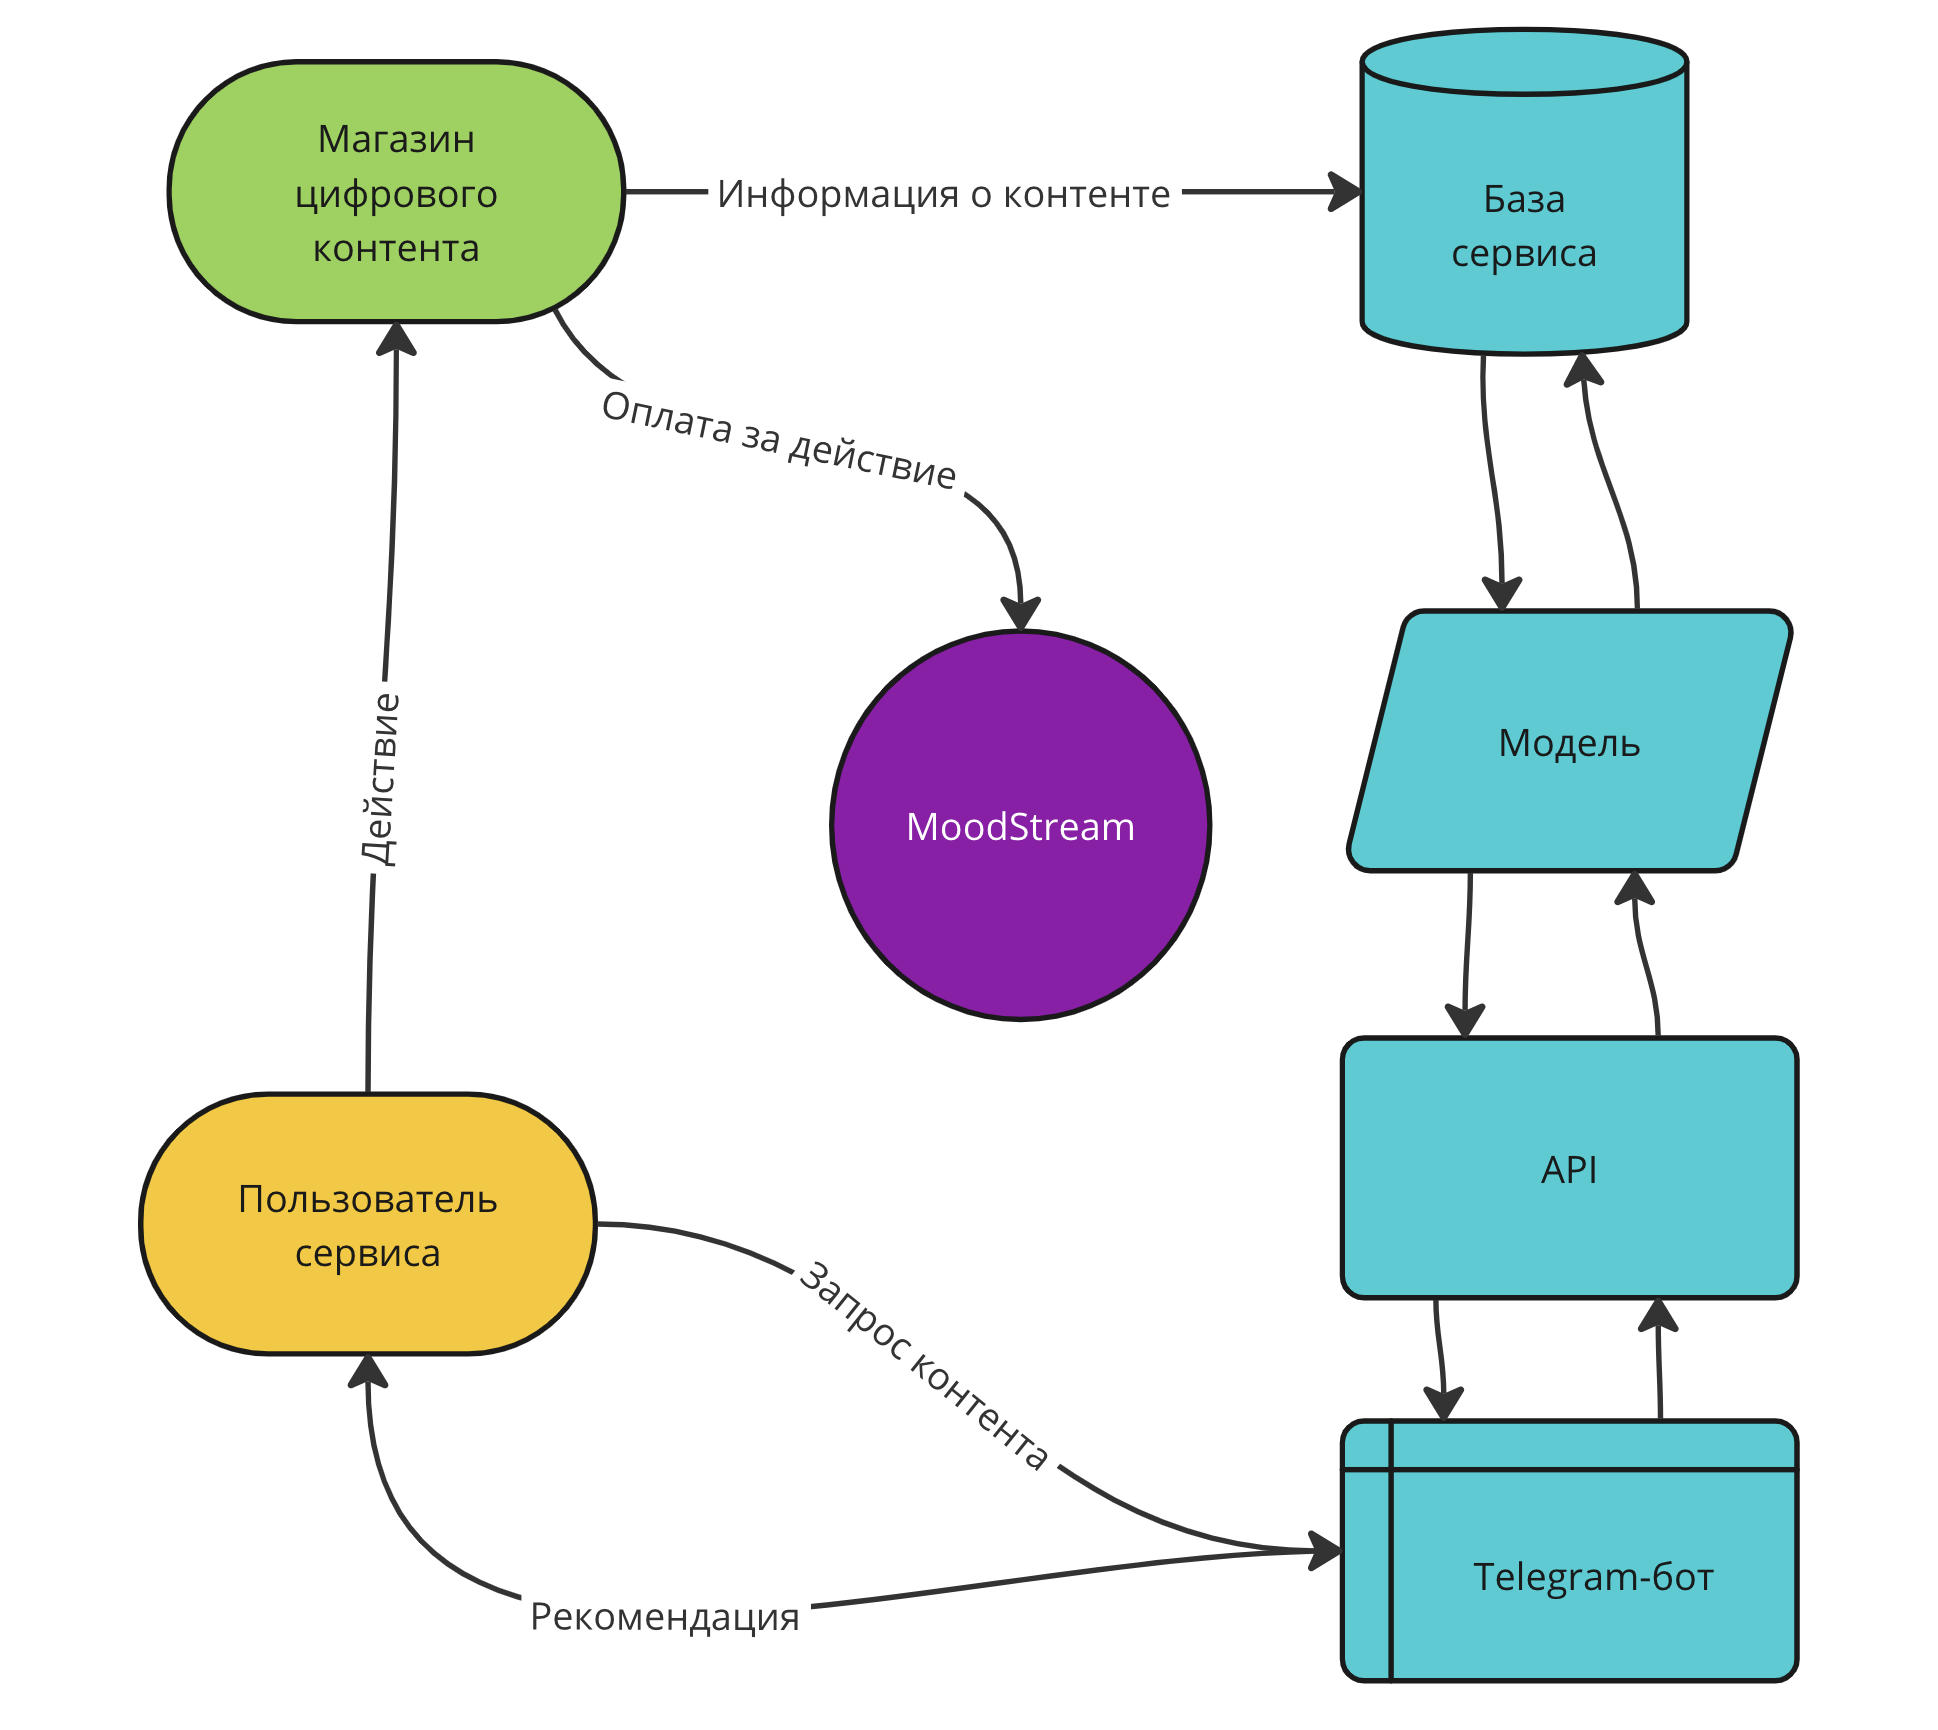

Таким образом оценивать изменение эффективности ML-модели можно с помощью анализа соотношения пользователей сервиса к совершаемым ими действиям, несущим прибыль сервису. Если количество действий на пользователя растёт, то и ML-модель работает хорошо, т.к её рекомендации подходят пользователю.

## Задача

Разработать модель машинного обучения, которая будет рекомендовать пользователю фильмы, сериалы, книги или музыку на основе его предпочтений, настроения и свободного времени. Модель должна учитывать данные о схожести между контентом и предпочтениями пользователя, чтобы предложить наиболее подходящий контент.

На этапе **MVP** модель **не должна** учитывать историю выдачи пользователю. При этом модель учитывает информацию об отношении пользователя к контенту, которая собрана сервисом в момент опроса пользователя. 

## Ожидаемый результат

Ожидаемым результатом является набор служб, которые позволят выполнять свою задачу сервису:
- telegram-бот для взаимодействия с пользователем
- API, получающее запросы от бота, взаимодействующее с БД и Моделью и возвращающее в качестве ответа результат работы Модели
- Модель, формирующая выдачу
- БД, хранящая данные о доступном цифровом контенте и его характеристиках

## Baseline

> Вся информация о подготовке датасетов находится в [отдельном ноутбуке](https://github.com/inozemtseviv/moodstream-ml/blob/master/MoodStream_PREP.ipynb)

### Импорты

In [27]:
import pandas as pd
import requests, zipfile, io

MOVIES_DATA = 'https://github.com/inozemtseviv/moodstream-ml/blob/master/datasets/movies/movies.zip?raw=true';

### Базовая модель

На данном этапе в качестве рекомендации выдаётся что-то из топа, игнорируя время, настроение и предпочтения.
В дальнейшем эти параметры так же будут использоваться.

Метод `recommend` принимает на вход свободное время в секундах, настроение пользователя, спасок предпочитаемых жанров кино, книг и музыки, словарь с датафреймами и выводит предложения из топ-3 каждого датасета.

In [40]:
def recommend(time, mood, movie_genres, book_genres, music_genres, data):
    print(data['movies'][:3])

In [21]:
def download(url, file_name):
    get_response = requests.get(url, stream=True)
    with open(file_name, 'wb') as f:
        for chunk in get_response.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)


#### Подготовка датафрейма с фильмами

In [35]:
download(MOVIES_DATA, 'datasets/movies_data.zip')

In [41]:
movies_df = pd.read_csv('./datasets/movies_data.zip', compression='zip', sep='\t')
movies_df.head(5)

,poster,title,year,imdb_rating,movie_id,genres
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,9.3,318,"drama,crime"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,9.2,858,"drama,crime"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,9.0,58559,"drama,action,crime,thriller"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,9.0,1221,"drama,crime"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,9.0,1203,drama


### Рекомендации

In [42]:
recommend(600, 'good', ['horror'], ['novel'], ['pop'], {'movies': movies_df})

                                              poster  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   

                      title  year  imdb_rating  movie_id  \
0  The Shawshank Redemption  1994          9.3       318   
1             The Godfather  1972          9.2       858   
2           The Dark Knight  2008          9.0     58559   

                        genres  
0                  drama,crime  
1                  drama,crime  
2  drama,action,crime,thriller  
